# ML Intro

A notebook to show basic machine learning concepts.
Execute cells in order.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ML_functions import gradient_descent, plot_error_surface, supermodel, split_train_test
import seaborn as sns
sns.set_context('talk')

## ML problems

Problems in ML can be categorized in:

### Regression
Predict a continuous valued function.

### Classification
Predict a discrete valued function.

### Clustering
Group data according to some sort of similarity.

### Dimensionality reduction
Represent data in a new space with less dimensions than original space.

## Learning
![](/home/andrea/Documents/clases/PiCA/2018/teoria/MachineLearningDiagram.png)
### Supervised
Learning is the minimization of an Error function.
Assuming a linear model in the form $y=w_0 + w_1 x$ and a mean squared error function $\sum_n^N (y_n-t_n)^2/2N$, let's have a look at the error function over the value of the two parameters (we represent the surface of log Error for better visualization as contour lines).

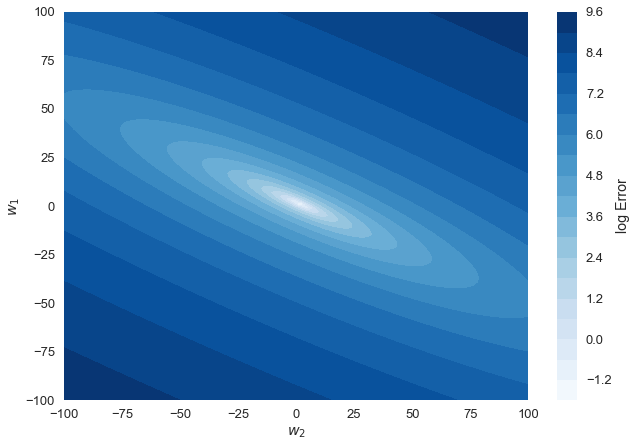

In [12]:
# Create a synthetic dataset
num_samples = 20  # number of data points
x = np.random.rand(num_samples)  # independent variable
noise = np.random.randn(num_samples) * .5  # noise
t = x * 2 + 1 + noise  # dependent variable (tutor)

# Visualize error surface over the two parameters w_0 and w_1
x1 = np.stack([np.ones([num_samples]), x])  # add an additional element to x (fixed at 1) to deal with bias
wmin = plot_error_surface(x1, t)
plt.show()

## Train and test set

### k-fold cross-validation

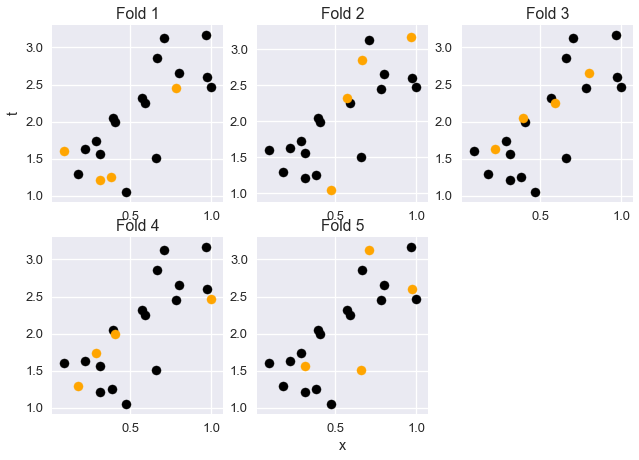

In [6]:
k = 5
x_tr, x_te, t_tr, t_te = split_train_test(x, t, k=k)
plt.figure()
rows = int(np.sqrt(k))
cols = np.ceil(k/int(np.sqrt(k)))
for i in range(k):
    plt.subplot(rows, cols, i+1)
    plt.scatter(x_tr[i], t_tr[i], color='black')
    plt.scatter(x_te[i], t_te[i], color='orange')
    plt.title('Fold ' + str(i+1))
    if i==0:
        plt.ylabel('t')
    if i==k-1:
        plt.xlabel('x')
plt.show()

## Overfitting

Linear model: training error: 0.17
		 test error: 0.19
Non linear model: training error: 0.12
		 test error: 1.56


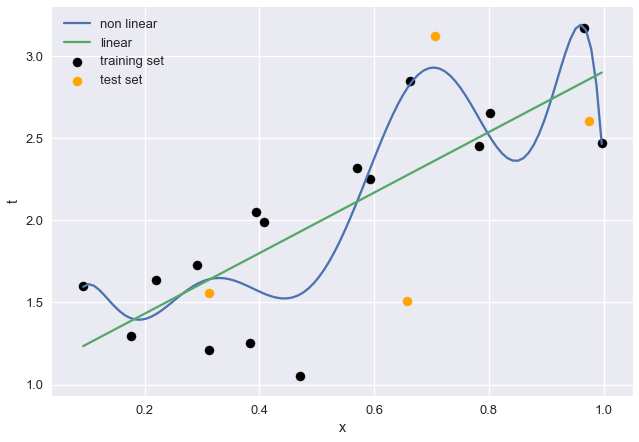

In [7]:
nl_model = supermodel(deg=8)
lin_model = supermodel(deg=1)
E_nl_tr = np.zeros([k])
E_nl_te = np.zeros([k])
E_lin_tr = np.zeros([k])
E_lin_te = np.zeros([k])
for i in range(k):
    nl_model.fit(x_tr[i], t_tr[i])
    lin_model.fit(x_tr[i], t_tr[i])
    E_nl_tr[i] = nl_model.error(x_tr[i], t_tr[i])
    E_nl_te[i] = nl_model.error(x_te[i], t_te[i])
    E_lin_tr[i] = lin_model.error(x_tr[i], t_tr[i])
    E_lin_te[i] = lin_model.error(x_te[i], t_te[i])
print("Linear model: training error: %.2f" % E_lin_tr.mean())
print("\t\t test error: %.2f" % E_lin_te.mean())
print("Non linear model: training error: %.2f" % E_nl_tr.mean())
print("\t\t test error: %.2f" % E_nl_te.mean())
xx = np.linspace(x.min(), x.max(), 100)
ynlin = nl_model.predict(xx)
ylin = lin_model.predict(xx)
plt.figure()
plt.scatter(x_tr[k-1], t_tr[k-1], color='black', label='training set')
plt.scatter(x_te[k-1], t_te[k-1], color='orange', label='test set')
plt.plot(xx, ynlin, label='non linear')
plt.plot(xx, ylin, label='linear')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

## Gradient descent
Iterative procedure to minimize an error function.
The idea: the gradient of the error function points in the direction of largest slope of the function; so, starting at a random position in parameters space and iteratively changing parameters value in the direction of the negative gradient is going to reduce the error function at each step of iteration.
You can run the following cell multiple times and see the first 10 steps of gradient descent. The red arrows represent the negative gradient at each step.

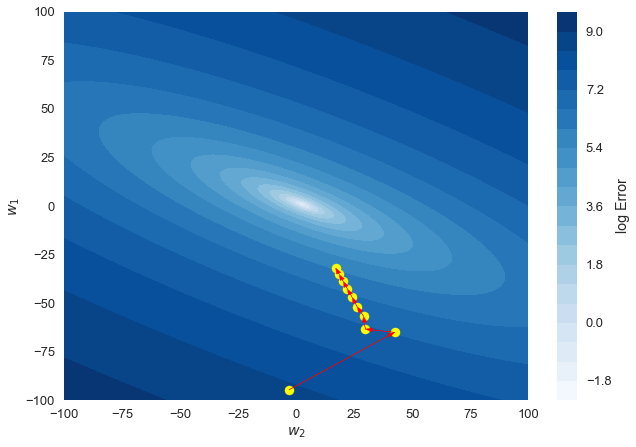

In [9]:
x = np.random.rand(10)
x1 = np.stack([np.ones([10]), x])
t = 1 + x*2 + np.random.randn(10) * .5
gradient_descent(x1, t)
plt.show()